Tamaño del DataFrame (filas, columnas): (891, 12)
Número total de elementos: 10692
Nombres de columnas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Índice: RangeIndex(start=0, stop=891, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)


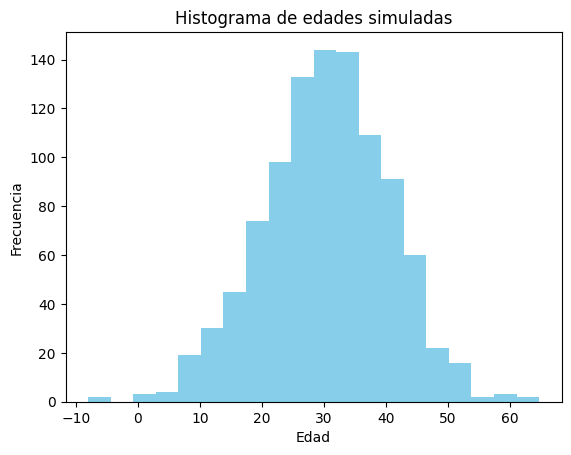

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Filas y columnas: (891, 12)
Columnas: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Media de edad: 29.36158249158249
Mediana de edad: 28.0
Desviación estándar de tarifa: 49.693428597180905
Máximo de tarifa: 512.3292
Mínimo de tarifa: 0.0
Suma total de tarifas: 28693.9493
Promedio de pasajeros por clase:
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


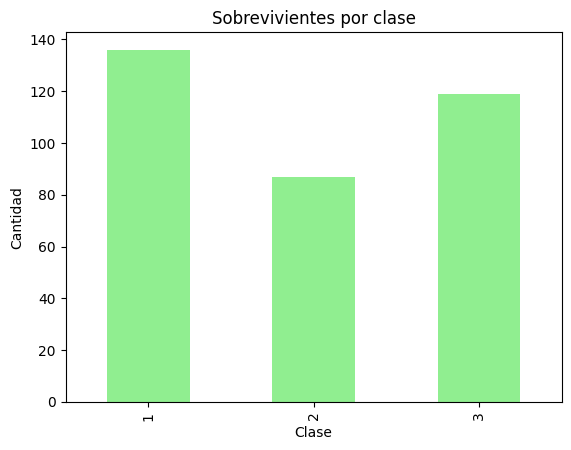

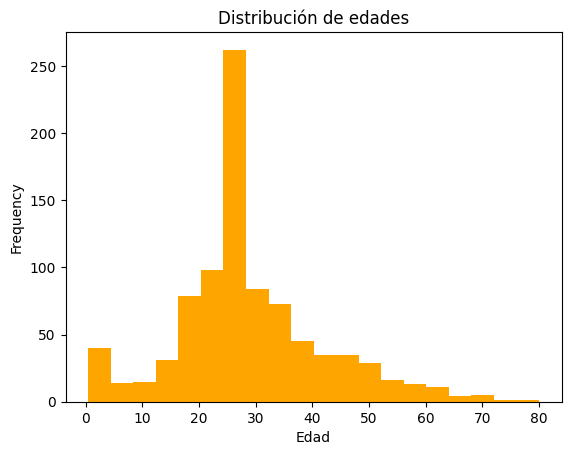

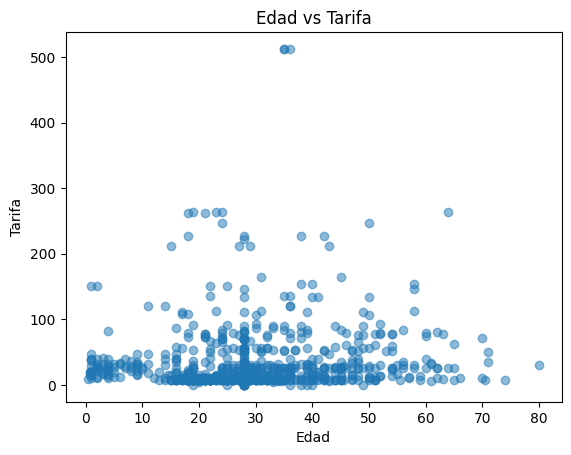

Supervivencia por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Supervivencia por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


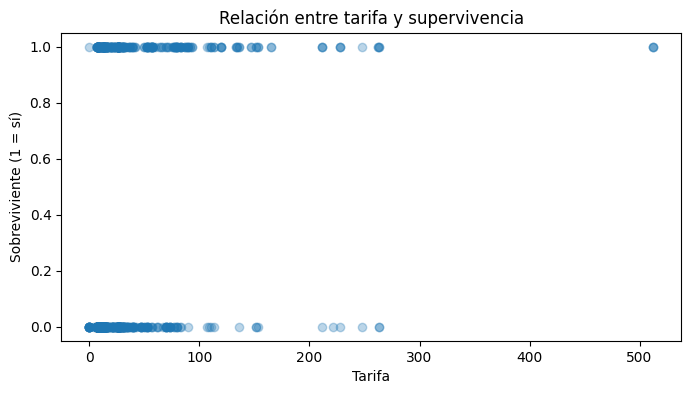

In [3]:
# Clase de 6 horas: Introducción a NumPy, Pandas y Matplotlib con Google Colab
# Dataset: Titanic

# ================================
# BLOQUE 1: INTRODUCCION Y SETUP
# ================================

# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset del Titanic desde URL
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic_url)

# Mostrar las primeras filas del dataset para conocer su estructura
df.head()

# Informaciones básicas del DataFrame
print("Tamaño del DataFrame (filas, columnas):", df.shape)
print("Número total de elementos:", df.size)
print("Nombres de columnas:", df.columns.tolist())
print("Índice:", df.index)

# Informacion general del dataset
df.info()

# Estadísticas descriptivas para las columnas numéricas
df.describe()

# ======================
# BLOQUE 2: USO DE NUMPY
# ======================

# Crear arrays básicos
arr1 = np.array([1, 2, 3, 4, 5])           # Array desde una lista
arr2 = np.zeros(5)                        # Array de ceros
arr3 = np.linspace(0, 10, 6)              # Array con 6 valores entre 0 y 10

# Mostrar los arrays
print("arr1:", arr1)
print("arr2:", arr2)
print("arr3:", arr3)

# Operaciones matemáticas con arrays
print("arr1 * 2:", arr1 * 2)              # Multiplica cada elemento por 2
print("Suma de arr1:", arr1.sum())        # Suma total del array
print("Media de arr1:", arr1.mean())      # Media
print("Desviación estándar:", arr1.std()) # Desviación estándar
print("Máximo:", arr1.max())              # Valor máximo
print("Mínimo:", arr1.min())              # Valor mínimo
print("Índice del valor máximo:", arr1.argmax())

# Simular edades con distribución normal
edades_simuladas = np.random.normal(loc=30, scale=10, size=1000)

# Histograma de edades simuladas
plt.hist(edades_simuladas, bins=20, color='skyblue')
plt.title("Histograma de edades simuladas")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# =============================
# BLOQUE 3: USO DE PANDAS (EDA)
# =============================

# Selección de columnas
nombres_edades = df[['Name', 'Age']]
nombres_edades.head()

# Filtrado: pasajeros mayores de 60 años
df[df['Age'] > 60]

# Valor nulo en la columna 'Age'
df['Age'].isnull().sum()

# Rellenar valores nulos en 'Age' con la mediana
mediana_edad = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_edad)

# Agrupar por sexo y calcular tasa de supervivencia
sobrevivencia_por_sexo = df.groupby('Sex')['Survived'].mean()
print(sobrevivencia_por_sexo)

# Conteo por clase de pasajero
df['Pclass'].value_counts()

# ================================
# Estadísticas y operaciones útiles
# ================================

# Tamaño y estructura del DataFrame
print("Filas y columnas:", df.shape)
print("Columnas:", df.columns)

# Medidas de tendencia central y dispersión
print("Media de edad:", df['Age'].mean())
print("Mediana de edad:", df['Age'].median())
print("Desviación estándar de tarifa:", df['Fare'].std())
print("Máximo de tarifa:", df['Fare'].max())
print("Mínimo de tarifa:", df['Fare'].min())

# Operaciones matemáticas
print("Suma total de tarifas:", df['Fare'].sum())
print("Promedio de pasajeros por clase:")
print(df.groupby('Pclass')['PassengerId'].count())

# ==============================
# BLOQUE 4: VISUALIZACION BÁSICA
# ==============================

# Gráfico de barras: sobrevivientes por clase
sobrevivientes_por_clase = df[df['Survived'] == 1]['Pclass'].value_counts()
sobrevivientes_por_clase.sort_index().plot(kind='bar', color='lightgreen')
plt.title("Sobrevivientes por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

# Histograma de edades
df['Age'].plot(kind='hist', bins=20, color='orange')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.show()

# Dispersión entre edad y tarifa
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title("Edad vs Tarifa")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()

# =============================================
# BLOQUE 5: MINI PROYECTO - ANALISIS DEL TITANIC
# =============================================

# Pregunta 1: ¿Quiénes sobrevivieron más: hombres o mujeres?
sobrevivencia_sexo = df.groupby('Sex')['Survived'].mean()
print("Supervivencia por sexo:")
print(sobrevivencia_sexo)

# Pregunta 2: ¿Influye la clase en la supervivencia?
sobrevivencia_clase = df.groupby('Pclass')['Survived'].mean()
print("Supervivencia por clase:")
print(sobrevivencia_clase)

# Pregunta 3: Relación entre tarifa y supervivencia
plt.figure(figsize=(8, 4))
plt.scatter(df['Fare'], df['Survived'], alpha=0.3)
plt.title("Relación entre tarifa y supervivencia")
plt.xlabel("Tarifa")
plt.ylabel("Sobreviviente (1 = sí)")
plt.show()

# ==============================================
# BLOQUE 6: CIERRE Y EVALUACION
# ==============================================

# Lista de chequeo para el cierre:
# - [ ] Cargar un dataset en Pandas
# - [ ] Realizar operaciones básicas en NumPy
# - [ ] Limpiar y explorar datos en un DataFrame
# - [ ] Crear gráficos simples con Matplotlib
# - [ ] Interpretar resultados

# Recomendación: guardar este notebook en Drive y revisarlo antes de la siguiente clase.

# Fin del notebook
